In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import skimage.util
from PIL import Image
import pandas as pd

In [2]:
dataset_path = 'dataset'
metadata_file_path = dataset_path + '/metadata.json'
IMAGE_SIZE = (128, 128)
MAX_IMAGES_PER_CLASS = 4 

classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

print(f'Classes encontradas: {classes}')

Classes encontradas: ['corkscrew', 'dinner_plate', 'fork', 'glass', 'jar', 'knife', 'ladle', 'pasta_server', 'small_knife', 'spoon']


In [3]:
def load_images_from_folder(folder_path, image_size=IMAGE_SIZE, max_images=40):
    images = []
    count = 0
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png')):
            img_path = os.path.join(folder_path, filename)
            try:
                img = skimage.io.imread(img_path)
                img = skimage.transform.resize(img, image_size)
                images.append(img)
                count += 1
                if count >= max_images:
                    break
            except Exception as e:
                print(f"Erro ao carregar {img_path}: {e}")
    return images

In [4]:
montages = {}

for classe in classes:
    class_path = os.path.join(dataset_path, classe)
    images = load_images_from_folder(class_path, image_size=IMAGE_SIZE, max_images=MAX_IMAGES_PER_CLASS)
    if not images:
        print(f'Nenhuma imagem encontrada para a classe "{classe}".')
        continue
    montage_image = skimage.util.montage(images, grid_shape=(2, 2), )
    montages[classe] = montage_image

In [5]:
import pandas as pd

def display_metadata_file(metadata_file_path):
    try:
        if metadata_file_path.lower().endswith('.json'):
            metadata_df = pd.read_json(metadata_file_path)
        elif metadata_file_path.lower().endswith('.csv'):
            metadata_df = pd.read_csv(metadata_file_path)
        else:
            raise ValueError("Formato de arquivo não suportado. Por favor, forneça um arquivo JSON ou CSV.")
        
#        import ace_tools as tools; tools.display_dataframe_to_user(name="Metadados de Imagens", dataframe=metadata_df)
        
        return metadata_df
    except Exception as e:
        print(f"Erro ao carregar o arquivo de metadados: {e}")

display_metadata_file(metadata_file_path)


,filename,width,height,format,mode,creation_time,last_modified_time,size_kb
0,0-01-V1-B.png,128,128,PNG,RGB,2024-09-03 19:22:07,2024-09-06 13:10:54,17.47
1,0-01-V1-W.png,128,128,PNG,RGB,2024-09-03 19:22:07,2024-09-06 13:10:54,12.97
2,0-01-V2-B.png,128,128,PNG,RGB,2024-09-03 19:22:08,2024-09-06 13:10:54,18.30
3,0-01-V2-W.png,128,128,PNG,RGB,2024-09-03 19:22:07,2024-09-06 13:10:54,15.43
4,1-02-V1-B.png,128,128,PNG,RGB,2024-09-03 19:22:08,2024-09-06 13:10:54,15.25
5,1-02-V1-W.png,128,128,PNG,RGB,2024-09-03 19:22:08,2024-09-06 13:10:54,12.04
6,1-02-V2-B.png,128,128,PNG,RGB,2024-09-03 19:22:08,2024-09-06 13:10:54,15.25
7,1-02-V2-W.png,128,128,PNG,RGB,2024-09-03 19:22:08,2024-09-06 13:10:54,12.82
8,2-03-V1-B.png,128,128,PNG,RGB,2024-09-03 19:22:08,2024-09-06 13:10:54,14.90
9,2-03-V1-W.png,128,128,PNG,RGB,2024-09-03 19:22:08,2024-09-06 13:10:54,10.84


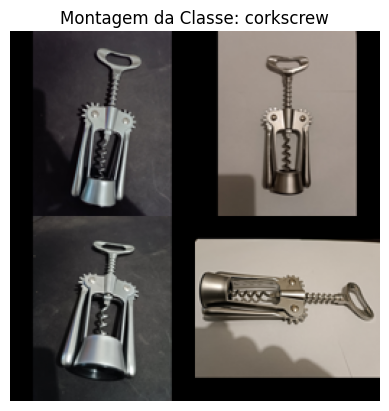

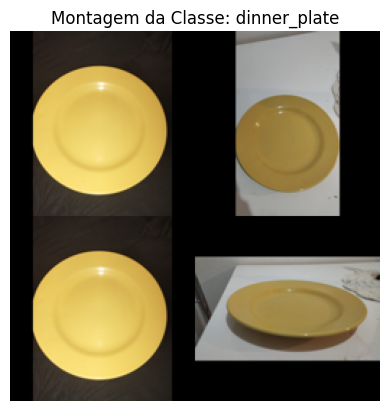

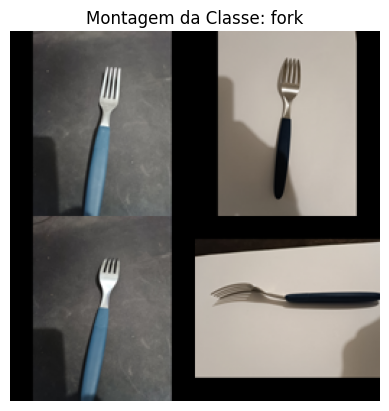

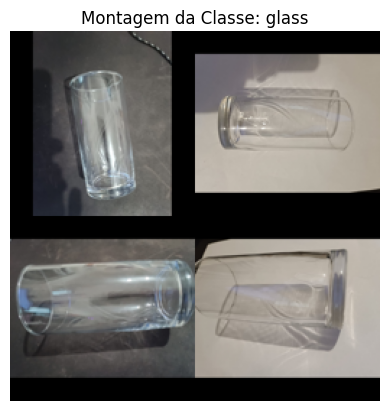

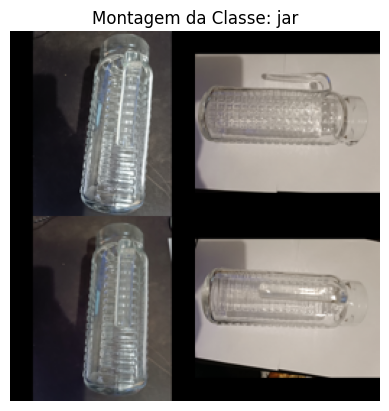

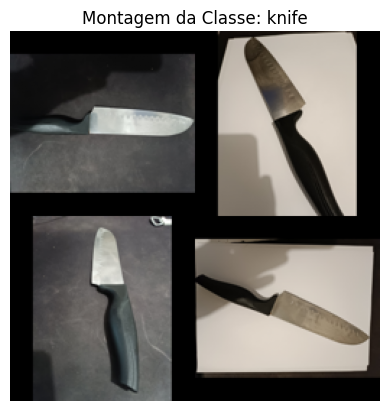

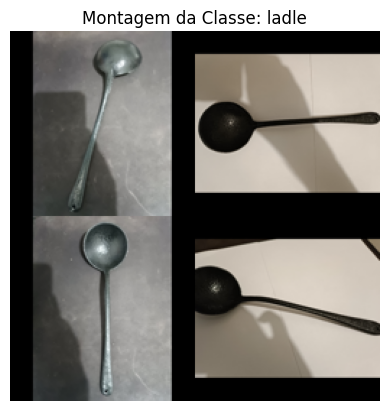

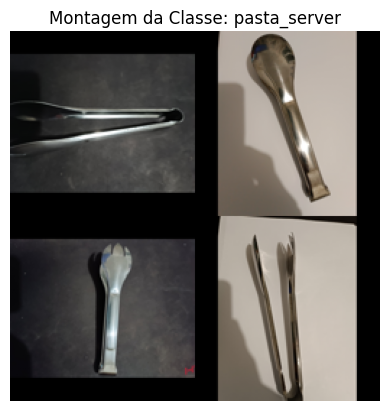

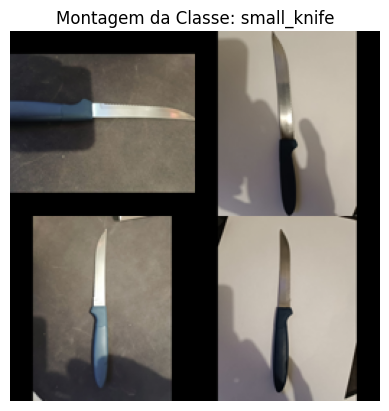

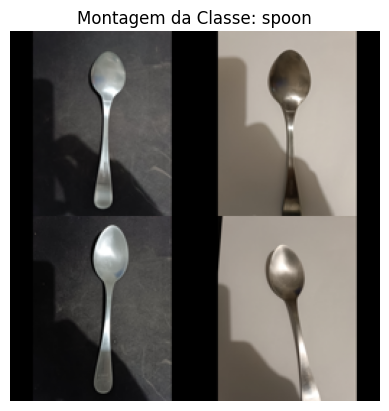

In [6]:
def display_montage(montage_image, title='Montagem', figsize=IMAGE_SIZE):
    plt.imshow(montage_image)
    plt.title(title)
    plt.axis('off')
    plt.show()

for classe, montage_image in montages.items():
    display_montage(montage_image, title=f'Montagem da Classe: {classe}')
